# Ornstein Uhlenbeck process - 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample 

In [2]:
import OU_tools
from OU_tools import *

## Ornstein-Uhlenbeck forward process

$$
dX_t = -\beta X_t dt + \sigma dW_t, \quad X(0)=X_0, \quad \beta,\sigma >0.
$$

The solution is
$$
X_t = e^{-\beta t}X_0 + \sigma\int^t_0 e^{-\beta(t-s)}\,\text{dW}_s,
$$
or equivalently,
$$
X_t = e^{-\beta t}X_0 + \sigma_\infty\sqrt{1-e^{-2\beta t}} \mathcal{N}(0, 1), \quad \sigma^2_{\infty} = \frac{\sigma^2}{2\beta},
$$
and
$$
E[X(t)] = e^{-\beta t}E[X_0], \quad \text{Var}[X(t)] = e^{-2\beta t}\text{Var}[X_0] + \left(1 - e^{-2\beta t}\right)\sigma^2_{\infty}.
$$

## Example 1

If $X_0\sim N(\mu_0, \sigma_0^2)$, we have
$$
E[X(t)] = e^{-\beta t}\mu_0, \quad \text{Var}[X(t)] = e^{-2\beta t}\sigma_0^2 + \left(1 - e^{-2\beta t}\right)\sigma^2_{\infty}.
$$
* The probability density function is
$$
p_t(x) = \frac{1}{\sqrt{2\pi}\sigma_t}e^{-\frac{(x - m(t))^2}{2\sigma_t^2}}, 
$$
where
$$
m(t) = e^{-\beta t}\mu_0, \quad \sigma_t^2 = e^{-2\beta t}\sigma_0^2 + \left(1 - e^{-2\beta t}\right)\sigma^2_{\infty}.
$$
* The score function is given by
$$
s(x, t) = -\nabla_x \log p_t(x) =-\frac{x - m(t)}{\sigma_t^2}.
$$

---

* Euler-Maruyama method:
$$
\hat{X}(t_{n+1}) = \hat{X}(t_{n}) - \beta \hat{X}(t_{n}) \Delta t + \sigma\sqrt{\Delta t}Z(t_n), \quad Z(t_i)\sim\mathcal{N}(0, 1).
$$

In [3]:
# parameters of the system
beta = 2.0
sigma = 2.0

# T: Terminal time
T = 5

# N: number of trials
N = 1000

# M: number of steps
M = 1000
dt = T/M

# initial condition
mu_0 = 8.0
sigma_0 = 0.5

# At t=T
mean_T = np.exp(-beta*T)*mu_0
sigma_T_square = np.exp(-2.0*beta*T)*(sigma_0**2)+ (1-np.exp(-2.0*beta*T))*(sigma**2)/(2.0*beta)
sigma_T = np.sqrt(sigma_T_square)
mean_inf = 0.0
sigma_inf = np.sqrt(sigma**2/(2.0*beta))

The left panel shows the initial sampling at X(t=0).

The right panel shows the results at X(t=T) and its maximum likelihood estimation (MLE).
MLE:
meam =  -0.017013300893680753
std =  1.022756606452331

Theoretical results:
Theoretical meam =  0.00036319943809987883
Theoretical std =  0.9999999992270674


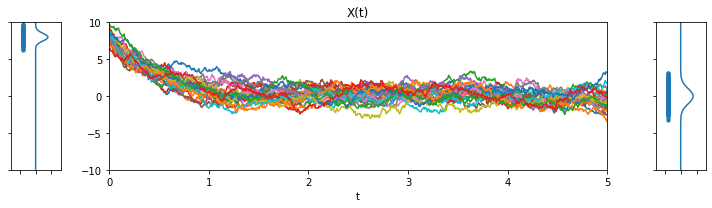

In [4]:
OU_forward(beta, sigma, mu_0, sigma_0, mean_T, sigma_T, T, N, M)

## Example: Ornstein-Uhenbeck reverse process

$$
dX_t = \left(-\beta X_t - \sigma^2 s(X_t, t)\right)  dt + \sigma dW_t.
$$

Reverse time Euler-Maruyama method:
$$
\hat{X}(t_{n-1}) = \hat{X}(t_{n}) +  \left(-\beta \hat{X}(t_{n}) -\sigma^2 s(\hat{X}(t_{n}), t) \right) (-\Delta t) + \sigma\sqrt{\Delta t}Z(t_n), \quad Z(t_i)\sim\mathcal{N}(0, 1).
$$

In [5]:
print('beta    = ', beta)
print('sigma   = ', sigma)
print('mean_T   = ', mean_T)
print('sigma_T   = ', sigma_T)
print('T       = ', T)

beta    =  2.0
sigma   =  2.0
mean_T   =  0.00036319943809987883
sigma_T   =  0.9999999992270674
T       =  5


The right panel shows the initial sampling at X(t=T).

The left panel shows the results at X(t=0) and its maximum likelihood estimation (MLE).
MLE:
meam =  7.99139346535718
std =  0.5146715993666016

Theoretical results
Theoretical meam =  8.0
Theoretical std =  0.5


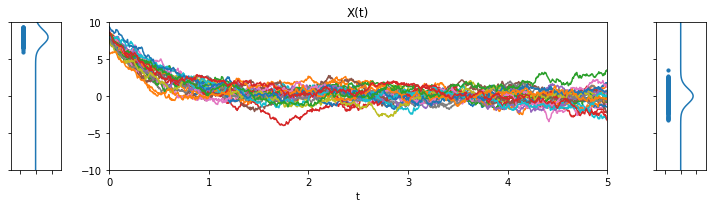

In [6]:
OU_reverse(beta, sigma, mu_0, sigma_0, mean_T, sigma_T, T, N, M)

## Example 3: Ornstein-Uhenbeck reverse process 2

$$
X_N\sim N(0, \sigma^2_{\infty}), \quad \sigma^2_{\infty} =\frac{\sigma^2}{2\beta}.
$$

In [7]:
print('beta    = ', beta)
print('sigma   = ', sigma)
print('sigma_inf = ', sigma_inf)
print('T       = ', T)
print('M       = ', M)

beta    =  2.0
sigma   =  2.0
sigma_inf =  1.0
T       =  5
M       =  1000


The right panel shows the initial sampling at X(t=T).

The left panel shows the results at X(t=0) and its maximum likelihood estimation (MLE).
MLE:
meam =  8.009701717420487
std =  0.5217628586143049

Theoretical results
Theoretical meam =  8.0
Theoretical std =  0.5


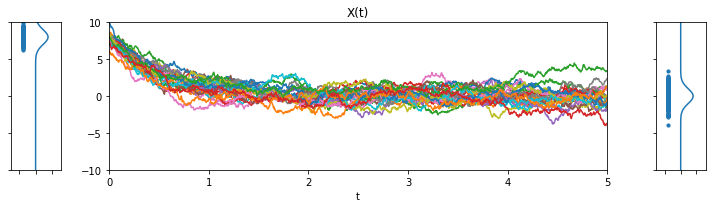

In [8]:
OU_reverse(beta, sigma, mu_0, sigma_0, mean_inf, sigma_inf, T, N, M)

## Example 4: Backward ODE

$$
dX_t = \left(-\beta X_t - \frac{\sigma^2}{2} s(X_t, t)\right)  dt.
$$

Reverse time Euler-Maruyama method:
$$
\hat{X}(t_{n-1}) = \hat{X}(t_{n}) +  \left(-\beta \hat{X}(t_{n}) - \frac{\sigma^2}{2} s(\hat{X}(t_{n}), t_n)\right) \hat{X}(t_{n}) (-\Delta t).
$$

In [9]:
print('beta    = ', beta)
print('sigma   = ', sigma)
print('sigma_inf = ', sigma_inf)
print('T       = ', T)
print('M       = ', M)

beta    =  2.0
sigma   =  2.0
sigma_inf =  1.0
T       =  5
M       =  1000


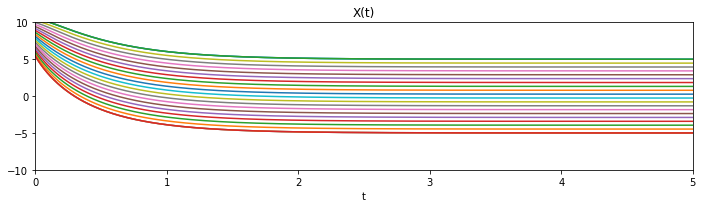

In [10]:
OU_reverse_ODE(beta, sigma, mu_0, sigma_0, mean_inf, sigma_inf, T, N, M)